In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
data.head()

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7


Проверка размера датасета и наличия пропущенных значений.

In [5]:
data.shape

(319, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repository_name  319 non-null    object
 1   commit_hash      319 non-null    object
 2   commit_date      319 non-null    object
 3   commit_author    319 non-null    object
 4   commit_message   319 non-null    object
 5   bugs             319 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 15.1+ KB


In [7]:
data.repository_name.unique()

array(['mlm', 'standard', 'agent', 'conductor', 'dockers', 'sensor'],
      dtype=object)

In [8]:
data.commit_author.unique()

array(['Victor', 'Peggy', 'Wendy', 'Trudy', 'Mallory', 'Eve', 'Dabe',
       'Carol', 'Bob', 'Alice'], dtype=object)

In [9]:
data.commit_hash.unique().size

319

In [10]:
data.commit_message.unique().size

309

В commit_hash и commit_message практически все значения уникальны, поэтому они не будут использоваться в обучении модели. Также не будет использована commit_date.

repository_name и commit_author - категориальные переменные, для дальнейшей работы они будут преобразованы в фиктивные переменные.

In [11]:
categorical_columns = data[['repository_name', 'commit_author']]


In [12]:
categorical_columns.head()

,repository_name,commit_author
0,mlm,Victor
1,mlm,Victor
2,mlm,Victor
3,mlm,Victor
4,mlm,Victor


In [13]:
enc = LabelEncoder()

In [14]:
for column in categorical_columns:
    data[column] = enc.fit_transform(categorical_columns[column])
data.head()

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,3,b28abb42,2020-06-12T14:26:12,8,объяснения предсказаний с помощью lime,4
1,3,438b5c4d,2020-06-12T11:53:10,8,Поставил lime вместо eli5,3
2,3,8e6e4f31,2020-06-11T15:19:03,8,Скрипт для создния пакетов обновления,4
3,3,5e0956a6,2020-06-11T10:42:29,8,Сортировка весов по убыванию,3
4,3,b9f4b40c,2020-06-11T09:25:19,8,не надо конвертировать массив до операции по с...,7


In [15]:
data = data.drop(['commit_hash', 'commit_message', 'commit_date'], axis = 1)

In [16]:
data

,repository_name,commit_author,bugs
0,3,8,4
1,3,8,3
2,3,8,4
3,3,8,3
4,3,8,7
...,...,...,...
314,4,3,1
315,4,3,2
316,4,3,3
317,4,3,1


Матрицу корреляции позволит измерить линейные отношения между переменными.

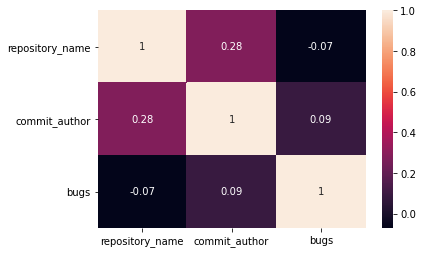

In [17]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Проверка переменных на наличие линейной взаимосвязи.

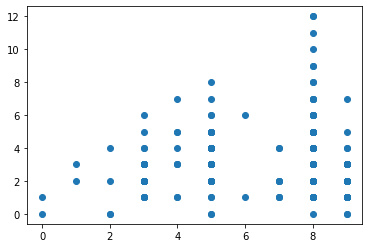

In [19]:
plt.scatter(data.commit_author, data.bugs)

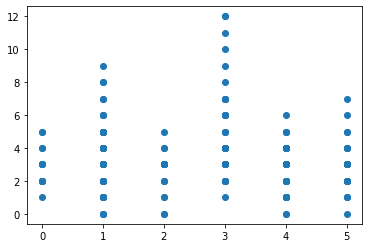

In [20]:
plt.scatter(data.repository_name, data.bugs)

In [21]:
data = pd.get_dummies(data, columns=["commit_author", "repository_name"])

In [22]:
data.shape

(319, 17)

Создадим датасеты с признаками и целевой переменной.

In [23]:
X = data.drop(['bugs'], axis =1)

In [24]:
y = data.bugs

Для обучения модели данные разбиваются на тестовое и тренировочное множества.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

В качестве модели выбран SGDRegressor

In [27]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)

In [28]:
linear_regression_model.fit(X_train, y_train)

SGDRegressor(tol=0.0001)

In [29]:
train_predictions = linear_regression_model.predict(X_train) 
test_predictions = linear_regression_model.predict(X_test)

Для оценки модели использованы MSE и R2-показатель.

In [30]:
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

print("Train R2: {}".format(train_r2))
print("Test R2: {}".format(test_r2))

Train MSE: 2.465100083913027
Test MSE: 2.7026848058130466
Train R2: 0.22765168291587168
Test R2: 0.30890588566224275
